## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [4]:
# Study data files
mouse_metadata_df = "data/Mouse_metadata.csv"
study_results_df = "data/Study_results.csv"

In [5]:
# Read the mouse data results
mouse_metadata = pd.read_csv(mouse_metadata_df)
mouse_metadata.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# Read the study results
study_results = pd.read_csv(study_results_df)
study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
combined_study_mouse = pd.merge(study_results,mouse_metadata,how="outer", on=["Mouse ID"])
# Display the data table for preview
combined_study_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
#combined_study_mouse.shape

In [9]:
# Checking the number of mice.
total=combined_study_mouse["Mouse ID"].value_counts()
total
#length of the count of each unique mouse
total_unique_mouse = len(total)
total_unique_mouse

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_study_mouse.loc[combined_study_mouse.duplicated(subset=["Mouse ID","Timepoint",]), "Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mice_id=combined_study_mouse[combined_study_mouse.duplicated(["Mouse ID","Timepoint"],keep=False)]
all_duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
all_duplicate_mice_id.shape

(10, 8)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_drop=combined_study_mouse.loc[combined_study_mouse.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_drop
clean_data_df = combined_study_mouse[combined_study_mouse['Mouse ID'].isin(duplicate_drop)==False]
clean_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
clean_data_df.shape

(1880, 8)

In [15]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice=clean_data_df["Mouse ID"].value_counts()
clean_number_mice
#length of the count of each unique mouse
new_number_mice = len(clean_number_mice)
new_number_mice

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
combined_study_mouse_sort=combined_study_mouse.sort_values(["Tumor Volume (mm3)"], ascending=True)
combined_study_mouse_sort.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
514,k403,45,22.050126,1,Ramicane,Male,21,16
1700,s185,45,23.343598,1,Capomulin,Female,3,17
513,k403,40,24.365505,1,Ramicane,Male,21,16
1699,s185,40,25.472143,1,Capomulin,Female,3,17
512,k403,35,26.546993,1,Ramicane,Male,21,16


In [28]:
#Identify the diferent Drug Regimen along with the total tumer volume for each using .groupby
drug_regimen_grouped = combined_study_mouse_sort.groupby(["Drug Regimen"])
drug_regimen_grouped

#total tumor volume for each drug regimen
total_tumor_volume = drug_regimen_grouped["Tumor Volume (mm3)"].sum()
total_tumor_volume

Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      8423.930878
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [30]:
#calculate the mean of each drug regimen
drug_regimen_mean = drug_regimen_grouped["Tumor Volume (mm3)"].mean()
drug_regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [31]:
#calculate the median of each drug regimen
drug_regimen_median = drug_regimen_grouped["Tumor Volume (mm3)"].median()
drug_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [32]:
#calculate the variance of each drug regimen
drug_regimen_variance = drug_regimen_grouped["Tumor Volume (mm3)"].var()
drug_regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [33]:
#calculate the standard deviation of each drug regimen
drug_regimen_std = drug_regimen_grouped["Tumor Volume (mm3)"].std()
drug_regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [34]:
#calculate the SEM for each drug regimen
drug_regimen_sem = drug_regimen_grouped["Tumor Volume (mm3)"].sem()
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [36]:
#summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
summary_stats_table = pd.DataFrame({"Mean": drug_regimen_mean, 
                                    "Median":drug_regimen_median, 
                                    "Variance":drug_regimen_variance, 
                                    "Standard Deviation": drug_regimen_std, 
                                    "SEM": drug_regimen_sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#split data set into groups based on drup regimen
drug_regimen_grouped=combined_study_mouse.groupby(["Drug Regimen"])

#number of mice for each treatment
mice_treatment = drug_regimen_grouped["Mouse ID"].count()
mice_treatment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

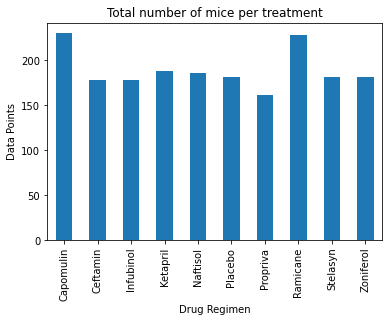

<Figure size 432x288 with 0 Axes>

In [74]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_per_treatment_chart=mice_treatment.plot(kind="bar", title="Total number of mice per treatment")
mice_per_treatment_chart.set_xlabel("Drug Regimen")
mice_per_treatment_chart.set_ylabel("Data Points")
plt.show()
plt.tight_layout()

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#split data set into groups based on mouse id and sex
mouse_gender_grouped=combined_study_mouse.groupby(["Mouse ID","Sex"])
mouse_gender_grouped

mouse_gender_df = pd.DataFrame(mouse_gender_grouped.size())

#total count of female and male mice
count_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
count_gender.columns = ["Total Count"]

#add percentage format female vs male
count_gender["Percentage of Sex"] = (100*(count_gender["Total Count"]/count_gender["Total Count"].sum()))

#add percentage format to "Percentage of Sex" column
count_gender["Percentage of Sex"] = count_gender["Percentage of Sex"]

#gender_df
count_gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


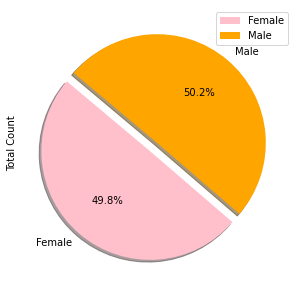

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#gender_pie =count_gender.plot.pie(y="Total Count", startangle =140, explode=explote, shadow=True, title= ("Female versus Male Mice"))
explode=(0.1,0)
colors=["pink", "orange"]
plot = count_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
#gender_pie.set_ylabel


## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regimes = combined_study_mouse[combined_study_mouse["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_regimes = four_regimes.sort_values(["Timepoint"], ascending=True)
four_regimes


four_regimes_data = four_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
four_regimes_data



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1613,Ceftamin,x226,0,45.000000
1488,Ceftamin,x581,0,45.000000
1478,Ceftamin,a275,0,45.000000
1468,Ceftamin,k210,0,45.000000
...,...,...,...,...
1824,Capomulin,g316,45,40.159220
1477,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1497,Ceftamin,x581,45,64.634949


In [139]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_reg = combined_study_mouse.loc[combined_study_mouse["Drug Regimen"] == "Capomulin",:]
ram_reg = combined_study_mouse.loc[combined_study_mouse["Drug Regimen"] == "Ramicane", :]
inf_reg = combined_study_mouse.loc[combined_study_mouse["Drug Regimen"] == "Infubinol", :]
cef_reg= combined_study_mouse.loc[combined_study_mouse["Drug Regimen"] == "Ceftamin", :]
cap_reg.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [140]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = cap_reg.groupby('Mouse ID').max()['Timepoint']
timepoint_df = pd.DataFrame(last_timepoint)
merge_df = pd.merge(timepoint_df, combined_study_mouse, on=("Mouse ID","Timepoint"),how="left")
merge_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

ValueError: Dimensions of labels and X must be compatible

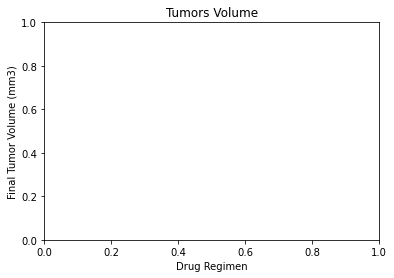

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_set = ["tumors", "tumors2", "tumors3", "tumors4"]

#fig1, ax1 = plt.subplots()
plt.title('Tumors Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

ax1.boxplot(data_set, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
